## BLACK FRIDAY SALE DATASET EDA AND FEATURE ENGINEERING

### 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# best practice is to combine test and train dataset
df_test = pd.read_csv('test.csv')
df_test.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df=pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
# user id not used
df.drop(['User_ID'], axis = 1, inplace = True)

In [9]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [10]:
pd.get_dummies(df['Gender'])


,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,True,False


In [11]:
# Handle Categorical features Gender

# df['Gender'] = df['Gender'].map({'F':0, 'M':1})  #-- one way

df['Gender'] = pd.get_dummies(df['Gender'], drop_first=1)   #-- Second way

In [12]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
# Handle Categorical features Age

df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
# here, we know from our domain knowledge that 0-17 cust will be very less and same for 55+, therefore to improve we can do
# target/ ordinal encoding

# also not using 0 as a category as might cause a problem in model training

df['Age'] = df['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
df.head()


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,7,16,C,4+,0,8,NaN,NaN,7969.0


In [15]:
# 2nd technique

# # Import label encoder 
# from sklearn import preprocessing 

# # label_encoder object knows 
# # how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder() 

# # Encode labels in column 'species'. 
# df['Age']= label_encoder.fit_transform(df['Age']) 

# df['Age'].unique() 


In [16]:
# categorical city variables

df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()


,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [17]:
df1 = pd.concat([df,df_city], axis = 1)
df1.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,1,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,1,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,1,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,1,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,7,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [18]:
df1.drop('City_Category', axis =1, inplace = True)


In [19]:
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,1,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,1,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,1,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,7,16,4+,0,8,NaN,NaN,7969.0,False,True


In [20]:
## Missing Values

df1.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [21]:
# observation - purchase is nul because its test dataset, but we need to fix other

In [22]:
## focus on replacing missing values

df1['Product_Category_2'].unique()


array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [23]:
df1['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [24]:
df1['Product_Category_2'].mode()[0]

np.float64(8.0)

In [25]:
## Replace the missing value with mode

df1['Product_Category_2'] = df1['Product_Category_2'].fillna(df1['Product_Category_2'].mode()[0])


In [26]:
df1['Product_Category_2'].isnull().sum()

np.int64(0)

In [27]:
## product category 3 replace missing values
df1['Product_Category_3'] = df1['Product_Category_3'].fillna(df1['Product_Category_3'].mode()[0])

In [28]:
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,False,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,False,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,True,7,16,4+,0,8,8.0,16.0,7969.0,False,True


In [29]:
df1.shape
df1.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [30]:
df1['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [31]:
df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].str.replace('+', '')
df1['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [32]:
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,1,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,False,1,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,1,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,False,1,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,True,7,16,4,0,8,8.0,16.0,7969.0,False,True


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(3), float64(3), int64(4), object(2)
memory usage: 62.0+ MB


In [34]:
## convert object into int

df1['Stay_In_Current_City_Years'] = df1['Stay_In_Current_City_Years'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(3), float64(3), int64(5), object(1)
memory usage: 62.0+ MB


In [35]:
df1['B'] = df1['B'].astype(int)
df1['C'] = df1['C'].astype(int)
df1['Gender'] = df1['Gender'].astype(int)
df1.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

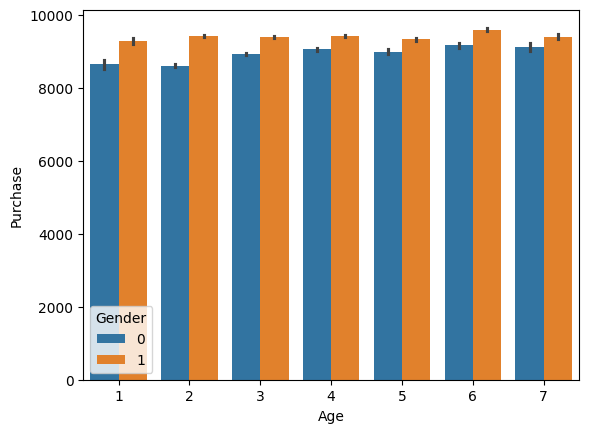

In [37]:
# Visuallisation

sns.barplot(x='Age',y='Purchase',hue='Gender',data=df1)

### Purchasing of men is high then women

<Axes: xlabel='Occupation', ylabel='Purchase'>

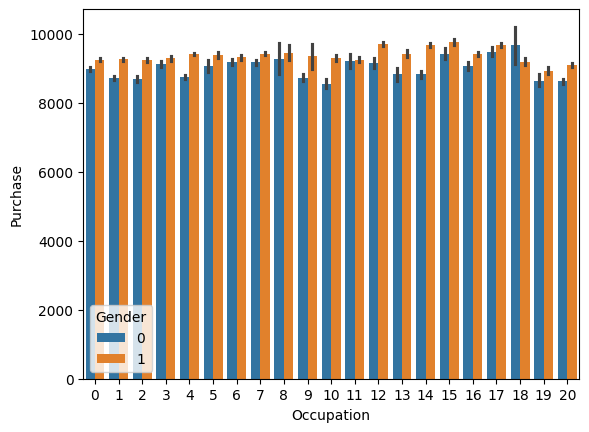

In [38]:
# Visuallisation with respect to occupation

sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df1)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

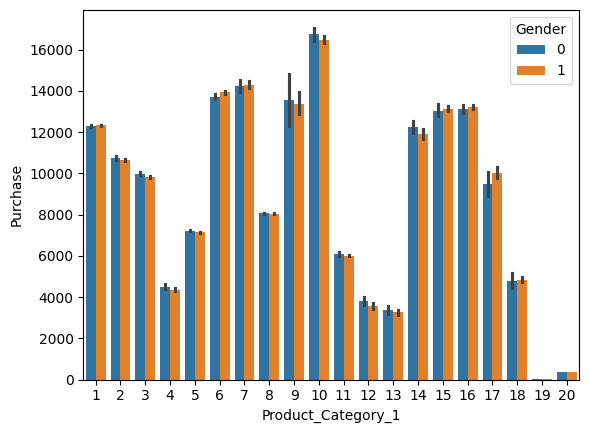

In [39]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df1)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

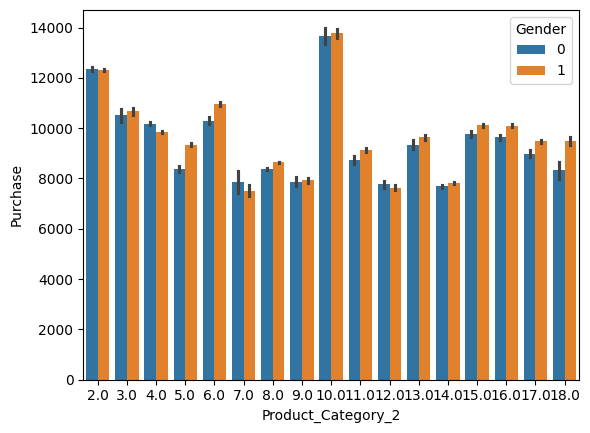

In [40]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df1)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

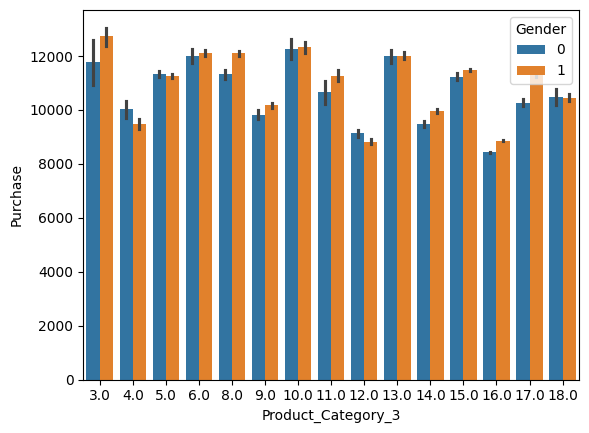

In [41]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df1)

In [42]:
df1.head()


,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [43]:
## Feature Scaling
df_test = df1[df1['Purchase'].isnull()]

# test for those which have null value in them

In [44]:
df_train = df1[~df1['Purchase'].isnull()]

In [57]:
X=df_train.drop('Purchase', axis=1)
X=df_train.drop('Product_ID', axis=1)

X.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [58]:
y=df_train['Purchase']
y.shape

(550068,)

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_test, y_train = train_test_split(X,y, test_size=0.33, random_state=42)

In [60]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)